<a href="https://colab.research.google.com/github/vsvipul007/CCode/blob/master/SpamHamClassificationUsing_LR_NB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string


In [5]:
#Load Data 
from google.colab import files
uploaded = files.upload()


Saving emails.csv to emails.csv


In [6]:
#Read the csv file
df = pd.read_csv('emails.csv')

#Print the data
df.head(5)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [8]:
#Print rows and colums
df.shape

(5728, 2)

In [9]:
#Get Column Names
df.columns

Index(['text', 'spam'], dtype='object')

In [10]:
#Check for duplicates
df.drop_duplicates(inplace=True)

In [11]:
#New rows and colums after duplicates removal
df.shape

(5695, 2)

In [12]:
#Number of missing data(NAN,Nan,na)
df.isnull().sum()

text    0
spam    0
dtype: int64

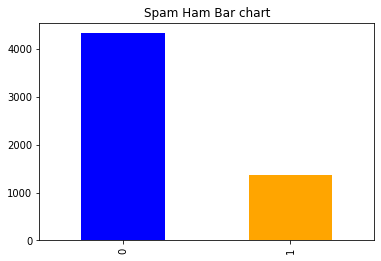

In [13]:
#Plotting Spam vs Ham using Bar Graph
count=pd.value_counts(df["spam"], sort= True)
count.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Spam Ham Bar chart')
plt.show()

In [14]:
#Download stopwords package
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
#Function for cleaning the text
def process_text(text):
  #1 remove punctuations
  #2 remove stopwords
  #3 return a list of clean text words
  #1
  nopunc = [c for c in text if c not in string.punctuation]
  nopunc = ''.join(nopunc)

  #2
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  #3
  return clean_words
'''def process_text(text):
  #1 remove punctuations
  #2 remove stopwords
  #3 return a list of clean text words
  #1
  nopunc = [c for c in text if c not in string.punctuation]
  nopunc = ''.join(nopunc)

  #2
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  #3
  return (clean_words)'''

"def process_text(text):\n  #1 remove punctuations\n  #2 remove stopwords\n  #3 return a list of clean text words\n  #1\n  nopunc = [c for c in text if c not in string.punctuation]\n  nopunc = ''.join(nopunc)\n\n  #2\n  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]\n\n  #3\n  return (clean_words)"

In [16]:
#Show the list of tokens (lemmas) - tokenization
df['text'].head(5).apply(process_text)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [17]:
#Create a copy of our text data into variables
mails= df['text']
mails_copy = mails
mails_copy

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5695, dtype: object

In [ ]:
#Apply text cleaning in copied variable
mails_copy = mails.apply(process_text)
mails_copy

Just an example to show Bag of words created using count vectorizer

In [ ]:
#Example
msg4 = 'hello world hello hello world play'
msg5 = 'test test test test one hello'
print(msg4)
print()
#Convert text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
bow4 = CountVectorizer(analyzer=process_text).fit_transform([[msg4],[msg5]])
print(bow4)
print()
print(bow4.shape)

hello world hello hello world play

  (0, 4)	3
  (0, 3)	3
  (0, 5)	9
  (0, 7)	5
  (0, 0)	5
  (0, 12)	2
  (0, 9)	2
  (0, 2)	2
  (0, 8)	1
  (0, 1)	1
  (0, 13)	1
  (1, 4)	1
  (1, 3)	6
  (1, 5)	2
  (1, 7)	2
  (1, 0)	5
  (1, 11)	8
  (1, 10)	4
  (1, 6)	1

(2, 14)


In [ ]:
#Covert text into matrix of tokens using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])


In [ ]:
print(messages_bow.shape)

(5695, 37229)


In [ ]:
#Covert text into matrix of tokens using Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer("english")
messages_tfidf = vectorizer.fit_transform(mails_copy)
messages_tfidf

<5695x37187 sparse matrix of type '<class 'numpy.float64'>'
	with 544384 stored elements in Compressed Sparse Row format>

In [ ]:
#Train Test Split for TF IDF vectorizer
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(messages_tfidf,df['spam'],test_size = 0.20, random_state = 0)

In [ ]:
#Train Test Split for count vectorizer 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(messages_bow,df['spam'],test_size = 0.20, random_state = 0)

In [ ]:
#Get the shape of messages_bow
#messages_bow.shape
print(messages_tfidf.shape)

(5695, 37187)


**Logistic Regression Part** 

In [ ]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression(solver='liblinear', penalty='l1')
lrclassifier.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Evaluate model on training data when Logistic Regression is used
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
lrpred = lrclassifier.predict(X_train)
print(classification_report(y_train,lrpred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train,lrpred))
print()
print('Accuracy Score: ', accuracy_score(y_train,lrpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       1.00      1.00      1.00      1099

    accuracy                           1.00      4556
   macro avg       1.00      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3454    3]
 [   1 1098]]

Accuracy Score:  0.9991220368744512


In [ ]:
#Evaluate model on test data when Logistic regression is used
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
lrpred = lrclassifier.predict(X_test)
print(classification_report(y_test,lrpred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test,lrpred))
print()
print('Accuracy Score: ', accuracy_score(y_test,lrpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       870
           1       0.98      0.96      0.97       269

    accuracy                           0.98      1139
   macro avg       0.98      0.97      0.98      1139
weighted avg       0.98      0.98      0.98      1139


Confusion Matrix: 
 [[864   6]
 [ 12 257]]

Accuracy Score:  0.9841966637401229


**Naive Bayes Part**

In [ ]:
#Create and train Naive Bayes Classififer
from sklearn.naive_bayes import MultinomialNB
nbclassifier = MultinomialNB()
nbclassifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Evaluate model on training data using Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = nbclassifier.predict(X_train)
print(classification_report(y_train,pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train,pred))
print()
print('Accuracy Score: ', accuracy_score(y_train,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3445   12]
 [   1 1098]]

Accuracy Score:  0.9971466198419666


In [ ]:
#Evaluate model on test data using naive bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = nbclassifier.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy Score: ', accuracy_score(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


Confusion Matrix: 
 [[862   8]
 [  1 268]]

Accuracy Score:  0.9920983318700615


**SVM Classifier**

In [ ]:
#Create and train svm classifier
from sklearn.svm import LinearSVC
svmclassifier = svm.SVC(C=0.1, kernel='linear')
svmclassifier.fit(X_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Evaluate model on training data using SVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
svmpred = svmclassifier.predict(X_train)
print(classification_report(y_train,svmpred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train,svmpred))
print()
print('Accuracy Score: ', accuracy_score(y_train,svmpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       1.00      1.00      1.00      1099

    accuracy                           1.00      4556
   macro avg       1.00      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3457    0]
 [   1 1098]]

Accuracy Score:  0.9997805092186128


In [ ]:
#Evaluate model on test data using SVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
svmpred = svmclassifier.predict(X_test)
print(classification_report(y_test,svmpred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test,svmpred))
print()
print('Accuracy Score: ', accuracy_score(y_test,svmpred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       870
           1       0.97      0.95      0.96       269

    accuracy                           0.98      1139
   macro avg       0.98      0.97      0.97      1139
weighted avg       0.98      0.98      0.98      1139


Confusion Matrix: 
 [[862   8]
 [ 14 255]]

Accuracy Score:  0.9806848112379281


Accuracy Summarized
                  Logistic Regression  Naive Bayes     SVM
Tf-Idf                         97.278       90.693  93.678
Count Vectorizer               98.419       99.209  98.068


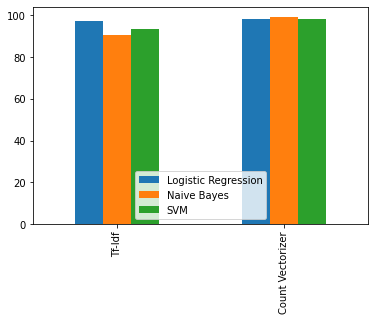

In [3]:
print("Accuracy Summarized")
data = {'Logistic Regression':[97.278,98.419], 'Naive Bayes':[90.693,99.209], 'SVM':[93.678, 98.068] }
index = ['Tf-Idf','Count Vectorizer']
df = pd.DataFrame(data,index = index)
print(df)

df.plot.bar()